# 사전 훈련된 컨브넷 사용하기

- 작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 매우 효과적인 방법은 사전 훈련된 네트워크를 사용
- 사전 훈련된 네트워크는 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크 
- 원본 데이터셋이 충분히 크고 일반적이라면 사전 훈련된 네트워크에 의해 학습된 특성의 계층 구조는 실제 세상에 대한 일반적인 모델로 효율적인 역할을 할 수 있다. 
- 새로운 문제가 원래 작업과 완전히 다른 클래스에 대한 것이더라도 이런 특성은 많은 컴퓨터 비전 문제에 유용. 예를 들어 (대부분 동물이나 생활 용품으로 이루어진) ImageNet 데이터셋에 네트워크를 훈련한 다음 이 네트워크를 이미지에서 가구 아이템을 식별하는 것 같은 다른 용도로 사용할 수 있다.
- 학습된 특성을 다른 문제에 적용할 수 있는 이런 유연성은 이전의 많은 얕은 학습 방법과 비교했을 때 딥러닝의 핵심 장점. 이런 방식으로 작은 데이터셋을 가진 문제에도 딥러닝이 효율적으로 작동할 수 있다.
- 여기에서는 (1.4백만 개의 레이블된 이미지와 1,000개의 클래스로 이루어진) ImageNet 데이터셋에서 훈련된 대규모 컨브넷을 사용 
- ImageNet 데이터셋은 다양한 종의 강아지와 고양이를 포함해 많은 동물들을 포함하고 있으며 강아지 vs. 고양이 분류 문제에 좋은 성능을 낼 수 있다.
- 캐런 시몬연과 앤드류 지서먼이 2014년에 개발한 VGG16 구조를 사용 
- VGG16은 간단하고 ImageNet 데이터셋에 널리 사용되는 컨브넷 구조이다. 
- VGG16은 조금 오래되었고 최고 수준의 성능에는 못미치며 최근의 다른 모델보다는 조금 무겁다.
- 하지만 이 모델의 구조가 이전에 보았던 것과 비슷해서 새로운 개념을 도입하지 않고 이해하기 쉽기 때문에 선택. 
- 이런 이름에는 VGG, ResNet, Inception, Inception-ResNet, Xception 등이 있으며 컴퓨터 비전을 위해 딥러닝을 계속 공부하다보면 이런 이름을 자주 만나게 된다.
- 사전 훈련된 네트워크를 사용하는 두 가지 방법이 있는데 특성 추출과 미세 조정이다.

- 합성곱 층만 재사용하는 이유는 합성곱 층에 의해 학습된 표현이 더 일반적이어서 재사용 가능하기 때문이다. 
- 컨브넷의 특성 맵은 사진에 대한 일반적인 컨셉의 존재 여부를 기록한 맵입니다. 그래서 주어진 컴퓨터 비전 문제에 상관없이 유용하게 사용할 수 있습니다. 
- 하지만 분류기에서 학습한 표현은 모델이 훈련된 클래스 집합에 특화되어 있다. 
- 분류기는 전체 사진에 어떤 클래스가 존재할 확률에 관한 정보만을 담고 있다. 더군다나 완전 연결 층에서 찾은 표현은 더 이상 입력 이미지에 있는 객체의 위치 정보를 가지고 있지 않다. 
- 완전 연결 층들은 공간 개념을 제거하지만 합성곱의 특성 맵은 객체의 위치를 고려한다. 
- 객체의 위치가 중요한 문제라면 완전 연결 층에서 만든 특성은 크게 쓸모가 없다.

- 특정 합성곱 층에서 추출한 표현의 일반성(그리고 재사용성)의 수준은 모델에 있는 층의 깊이에 달려 있다. 
- 모델의 하위 층(시작에 가까운 층)은 (에지, 색깔, 질감 등과 같이) 지역적이고 매우 일반적인 특성 맵을 추출한다. 
- 반면 상위 층(끝에 가까운 층)은 ('강아지 눈'이나 '고양이 귀'와 같이) 좀 더 추상적인 개념을 추출한다. 
- 만약 새로운 데이터셋이 원본 모델이 훈련한 데이터셋과 많이 다르다면 전체 합성곱 기반층을 사용하는 것보다는 모델의 하위 층 몇 개만 특성 추출에 사용하는 것이 좋다.

In [ ]:
import os, shutil
from google.colab import drive
drive.mount('/content/gdrive')

base = '/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs/cad'

train_dir = os.path.join(base, 'train')
val_dir = os.path.join(base, 'validation')
test_dir = os.path.join(base, 'test')

train_cat = os.path.join(train_dir, 'cats')
val_cat = os.path.join(val_dir, 'cats')
test_cat = os.path.join(test_dir, 'cats')

train_dog = os.path.join(train_dir, 'dogs')
val_dog = os.path.join(val_dir, 'dogs')
test_dog = os.path.join(test_dir, 'dogs')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.applications import VGG16

vgg = VGG16(weights='imagenet',# 이미지넷으로 학습한 가중치 가져옴
            include_top=False, # 이미지넷 데이터 자체의 1천 개의 레이블 말고, 강아지-고양이만 분류하는
                               # 우리만의 완전연결층을 쓸 것이기 때문에 최상위 분류기는 False로 두자.
            input_shape=(150,150,3))

VGG16 함수에 세 개의 매개변수를 전달합니다:

* `weights`는 모델을 초기화할 가중치 체크포인트를 지정합니다.
* `include_top`은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정합니다. 기본값은 ImageNet의 1,000개의 클래스에 대응되는 완전 연결 분류기를 포함합니다. 별도의 (강아지와 고양이 두 개의 클래스를 구분하는) 완전 연결 층을 추가하려고 하므로 이를 포함시키지 않습니다.
* `input_shape`은 네트워크에 주입할 이미지 텐서의 크기입니다. 이 매개변수는 선택사항입니다. 이 값을 지정하지 않으면 네트워크가 어떤 크기의 입력도 처리할 수 있습니다.

다음은 VGG16 합성곱 기반층의 자세한 구조입니다. 이 구조는 앞에서 보았던 간단한 컨브넷과 비슷합니다.

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## 특성 추출의 2가지 방식
* 새로운 데이터셋에서 합성곱 기반층을 실행하고 출력을 넘파이 배열로 디스크에 저장합니다. 그다음 이 데이터를 이 책의 1부에서 보았던 것과 비슷한 독립된 완전 연결 분류기에 입력으로 사용합니다. 합성곱 연산은 전체 과정 중에서 가장 비싼 부분입니다. 이 방식은 모든 입력 이미지에 대해 합성곱 기반층을 한 번만 실행하면 되기 때문에 빠르고 비용이 적게 듭니다. 하지만 이런 이유 때문에 이 기법에는 데이터 증식을 사용할 수 없습니다.
* 준비한 모델(`conv_base`) 위에 `Dense` 층을 쌓아 확장합니다. 그다음 입력 데이터에서 엔드 투 엔드로 전체 모델을 실행합니다. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반층을 통과하기 때문에 데이터 증식을 사용할 수 있습니다. 하지만 이런 이유로 이 방식은 첫 번째 방식보다 훨씬 비용이 많이 듭니다.

In [ ]:
# 첫 번째 방식 써 보기

import numpy as np, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base = '/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs/cad'

train_dir = os.path.join(base, 'train')
val_dir = os.path.join(base, 'validation')
test_dir = os.path.join(base, 'test')

train_cat = os.path.join(train_dir, 'cats')
val_cat = os.path.join(val_dir, 'cats')
test_cat = os.path.join(test_dir, 'cats')

train_dog = os.path.join(train_dir, 'dogs')
val_dog = os.path.join(val_dir, 'dogs')
test_dog = os.path.join(test_dir, 'dogs')

In [ ]:
gene = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract(dir, sample):
  feature = np.zeros((sample, 4,4,512)) # 샘플 담을 빈 그릇
  label = np.zeros(sample)
  generator = gene.flow_from_directory(dir,
                                      target_size = (150,150),
                                      batch_size = batch_size,
                                      class_mode = 'binary')
  
  i = 0

  for inputs, labels in generator:
    feature_batch = vgg.predict(inputs)
    feature[i * batch_size : (i+1) * batch_size] = feature_batch
    label[i * batch_size : (i+1) * batch_size] = labels
    i+=1

    if i*batch_size>=sample:
      break # 루프 안에서 데이터 무한 증식을 막기 위해 한 번씩 다 돌고나면 멈추기
  
  return feature, label

In [ ]:
train_feature, train_label = extract(train_dir, 2000)
val_feature, val_label = extract(val_dir, 1000)
test_feature, test_label = extract(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 평활화 작업

train_feature = np.reshape(train_feature, (2000, 4*4*512))
val_feature = np.reshape(val_feature, (1000, 4*4*512))
test_feature = np.reshape(test_feature, (1000, 4*4*512))

In [ ]:
from tensorflow.keras import models, layers, optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_feature, train_label,
                    epochs=30,
                    batch_size=20,
                    validation_data=(val_feature, val_label))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 3s 25ms/step - loss: 0.6048 - acc: 0.6660 - val_loss: 0.4418 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 2s 24ms/step - loss: 0.4330 - acc: 0.8060 - val_loss: 0.3569 - val_acc: 0.8680
Epoch 3/30
100/100 [==============================] - 2s 23ms/step - loss: 0.3518 - acc: 0.8510 - val_loss: 0.3228 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 2s 24ms/step - loss: 0.3170 - acc: 0.8735 - val_loss: 0.2945 - val_acc: 0.8960
Epoch 5/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2883 - acc: 0.8855 - val_loss: 0.2827 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2677 - acc: 0.8930 - val_loss: 0.2707 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2482 - acc: 0.9050 - val_loss: 0.2617 - val_acc: 0.8990
Epoch 8/30
100/100 [==============================] - 2s 24ms/step - loss: 0.232

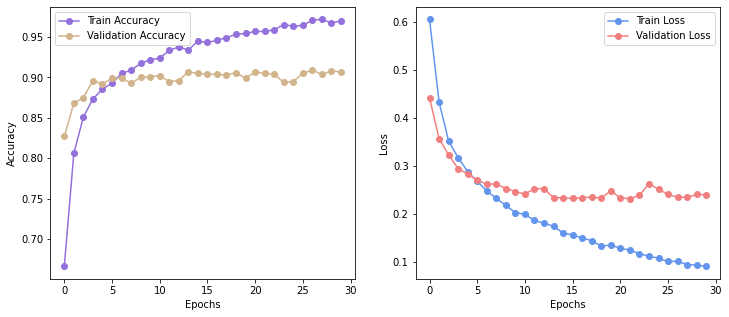

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = 30

fig, [ax1, ax2] = plt.subplots(figsize=(12,5), ncols=2)

ax1.plot(np.arange(epoch), acc, color='mediumpurple', marker='o', label='Train Accuracy')
ax1.plot(np.arange(epoch), val_acc, color='tan', marker='o', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(np.arange(epoch), loss, color='cornflowerblue', marker='o', label='Train Loss')
ax2.plot(np.arange(epoch), val_loss, color='lightcoral', marker='o', label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

- 약 90%의 검증 정확도에 도달했습니다. 이전 절에서 처음부터 훈련시킨 작은 모델에서 얻은 것보다 훨씬 좋습니다. 
-하지만 이 그래프는 많은 비율로 드롭아웃을 사용했음에도 불구하고 훈련이 시작하면서 거의 바로 과대적합되고 있다는 것을 보여줍니다. 
-작은 이미지 데이터셋에서는 과대적합을 막기 위해 필수적인 데이터 증식을 사용하지 않았기 때문입니다.

### 데이터 증식을 사용
- 이제 특성 추출을 위해 두 번째로 언급한 방법을 살펴보겠습니다. 
- 이 방법은 훨씬 느리고 비용이 많이 들지만 훈련하는 동안 데이터 증식 기법을 사용할 수 있습니다. 
- `conv_base` 모델을 확장하고 입력 데이터를 사용해 엔드 투 엔드로 실행합니다.

- 이 기법은 연산 비용이 크기 때문에 GPU를 사용할 수 있을 때 시도해야 합니다. - CPU에서는 적용하기 매우 힘듭니다. GPU를 사용할 수 없다면 첫 번째 방법을 사용하세요.

- 모델은 층과 동일하게 작동하므로 층을 추가하듯이 `Sequential` 모델에 (`conv_base` 같은) 다른 모델을 추가할 수 있습니다:

In [ ]:
# 두 번째 방식 써 보기
# 모델을 꾸밀 때 층 자체에 사전 훈련된 컨브넷을 넣어버림
# 그렇게 하면 모든 데이터에 적용되므로 비용이 많이 들고 속도도 느려진다.

mod = models.Sequential()
mod.add(vgg)
mod.add(layers.Flatten())
mod.add(layers.Dense(256, activation='relu'))
mod.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mod.summary() # vgg 모델이 아니라 시퀀셜 모델인 것을 확인 가능

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


[과제] 데이터 증식을 사용해 모델링, 학습, 평가 및 시각화를 수행 후 인사이트 기술

In [ ]:
# vgg 층에서는 가중치 업데이트가 되면 안 됨!!!
# 우리가 그 많은 시간을 들여 학습한 가중치가 훼손되고, 어마어마하게 많은 가중치가 피드백되는 것이기 때문에
# 이를 막기 위해 합성곱 기반 층의 가중치 업데이트는 동결하는 것이 옳다

print(f'동결 전 훈련 가중치 개수: {len(mod.trainable_weights)}')
vgg.trainable = False     # vgg만 동결한다!! 모델 전체를 동결하는 게 아니야!!!
print(f'동결 후 훈련 가중치 개수: {len(mod.trainable_weights)}')

동결 전 훈련 가중치 개수: 30
동결 후 훈련 가중치 개수: 4


In [ ]:
train_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

val_gen = ImageDataGenerator(rescale=1./255) # 검증용은 증식하지 말고 리스케일만 진행

train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size = (150,150), # 모든 이미지 크기를 150*150으로 변환
                                                batch_size = 20,
                                                class_mode = 'binary')   # 이진 분류이므로 바이너리 모드

val_generator = val_gen.flow_from_directory(val_dir,
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
mod.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = mod.fit(train_generator,
                  steps_per_epoch=100,
                  epochs=30,
                  validation_data = val_generator,
                  validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30


KeyboardInterrupt: ignored

## 미세 조정

모델을 재사용하는 데 널리 사용되는 또 하나의 기법은 특성 추출을 보완하는 미세 조정입니다.  
미세 조정은 특성 추출에 사용했던 동결 모델의 상위 층(출력층에 가까울수록 상위 층) 몇 개를 동결에서 해제하고 모델에 새로 추가한 층(여기서는 완전 연결 분류기)과 함께 훈련하는 것입니다.  
주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세 조정이라고 부릅니다.

![fine-tuning VGG16](https://s3.amazonaws.com/book.keras.io/img/ch5/vgg16_fine_tuning.png)